<a href="https://colab.research.google.com/github/Sivamani11/Energy-consumption-analysis-in-kare-building-the-present-past-and-future-/blob/main/energy_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pprint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

%matplotlib inline



In [2]:
df = pd.read_csv("/content/AEP_hourly.csv.zip")
print("="*50)
print("First Five Rows ","\n")
print(df.head(5), "\n")
print("="*50)
print("Information About Dataset", "\n")
print(df.info(), "\n")
print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")
print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



**data preprocessing**


In [3]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head (10)

<ipython-input-3-e1ef4b9dbca8>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week


,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday
2004-12-31 06:00:00,13038.0,12,2004,2004-12-31,06:00:00,53,Friday
2004-12-31 07:00:00,13692.0,12,2004,2004-12-31,07:00:00,53,Friday
2004-12-31 08:00:00,14297.0,12,2004,2004-12-31,08:00:00,53,Friday
2004-12-31 09:00:00,14719.0,12,2004,2004-12-31,09:00:00,53,Friday


Text(0.5, 1.0, 'Energy Consumption According to Year')

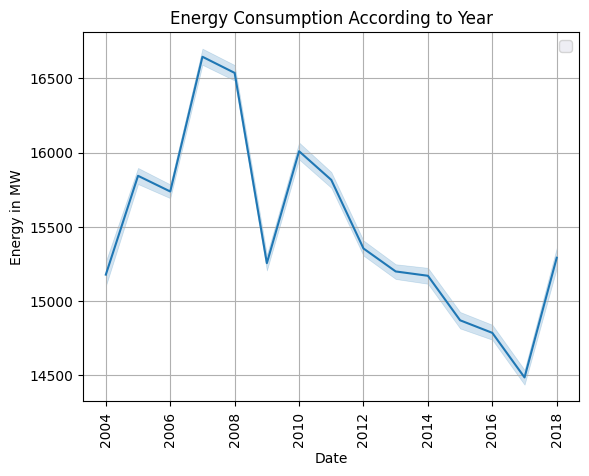

In [ ]:
from matplotlib import style
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
style.use('ggplot')
sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize': (15,6)})
plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.title("Energy Consumption According to Year")

**Data** **Visualizations**

<ipython-input-6-c876d7351a6f>:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2004= dataset["2004"]["AEP_MW"].to_list()
<ipython-input-6-c876d7351a6f>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_2004= dataset["2004"]["Date"].to_list()
<ipython-input-6-c876d7351a6f>:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2005= dataset["2005"]["AEP_MW"].to_list()
<ipython-input-6-c876d7351a6f>:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to 

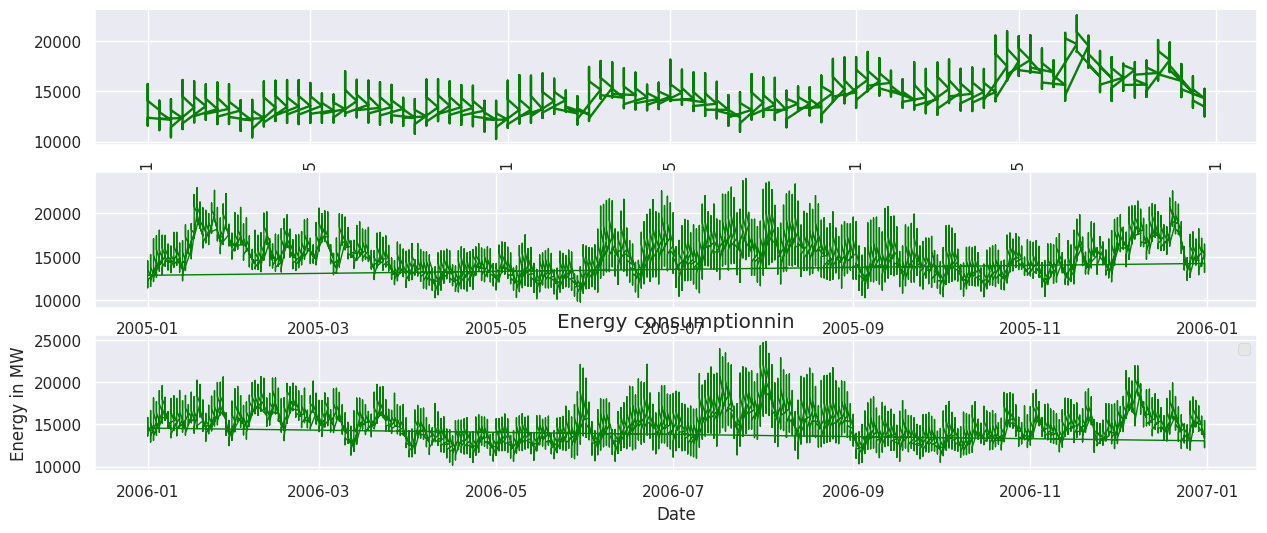

In [ ]:
from matplotlib import style
fig= plt.figure()
ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)
style.use('ggplot')
y_2004= dataset["2004"]["AEP_MW"].to_list()
x_2004= dataset["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)
y_2005= dataset["2005"]["AEP_MW"].to_list()
x_2005= dataset["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)
y_2006= dataset["2006"]["AEP_MW"].to_list()
x_2006= dataset["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)
plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

<ipython-input-7-73f3b9a5e924>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["AEP_MW"])


Text(0.5, 1.0, 'Energy Distribution')

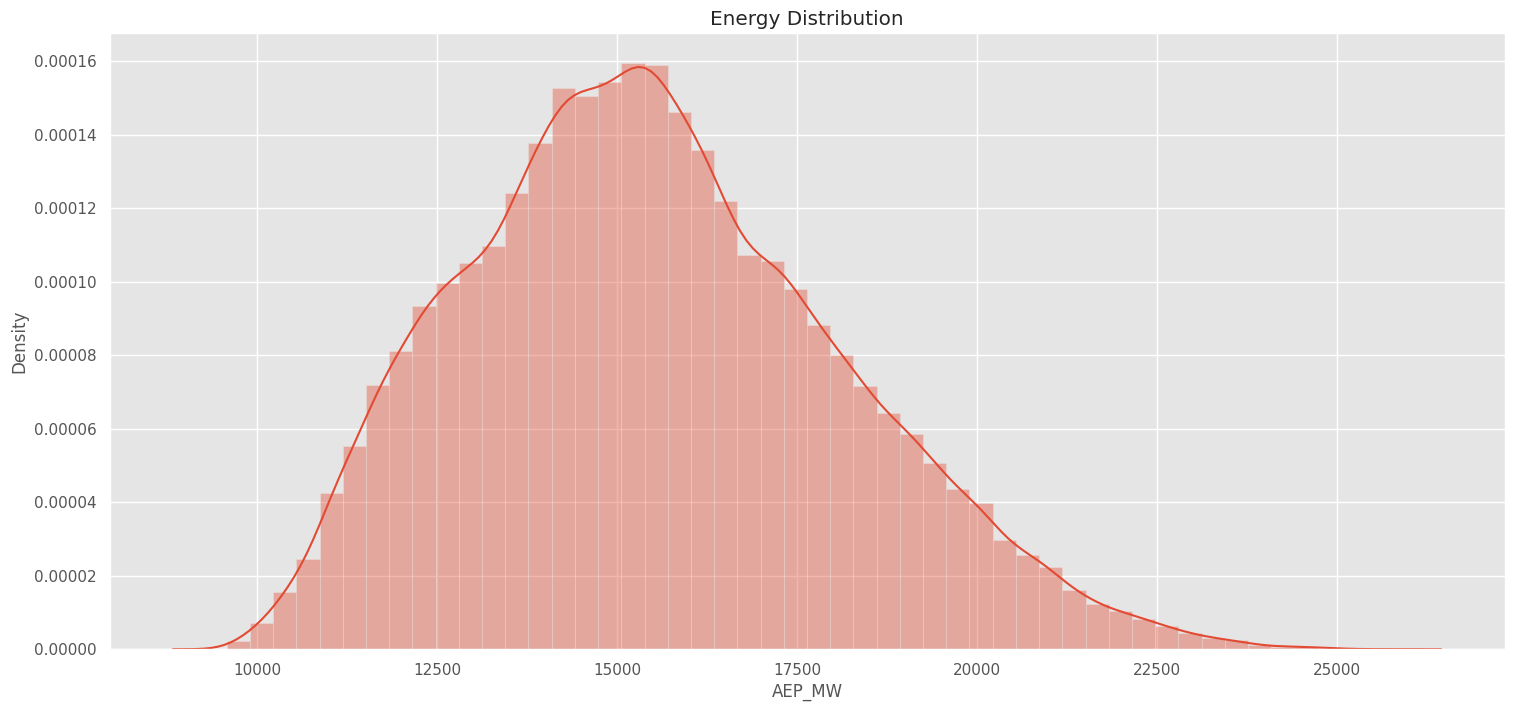

In [ ]:
sns.distplot(dataset["AEP_MW"])
plt.title("Energy Distribution")

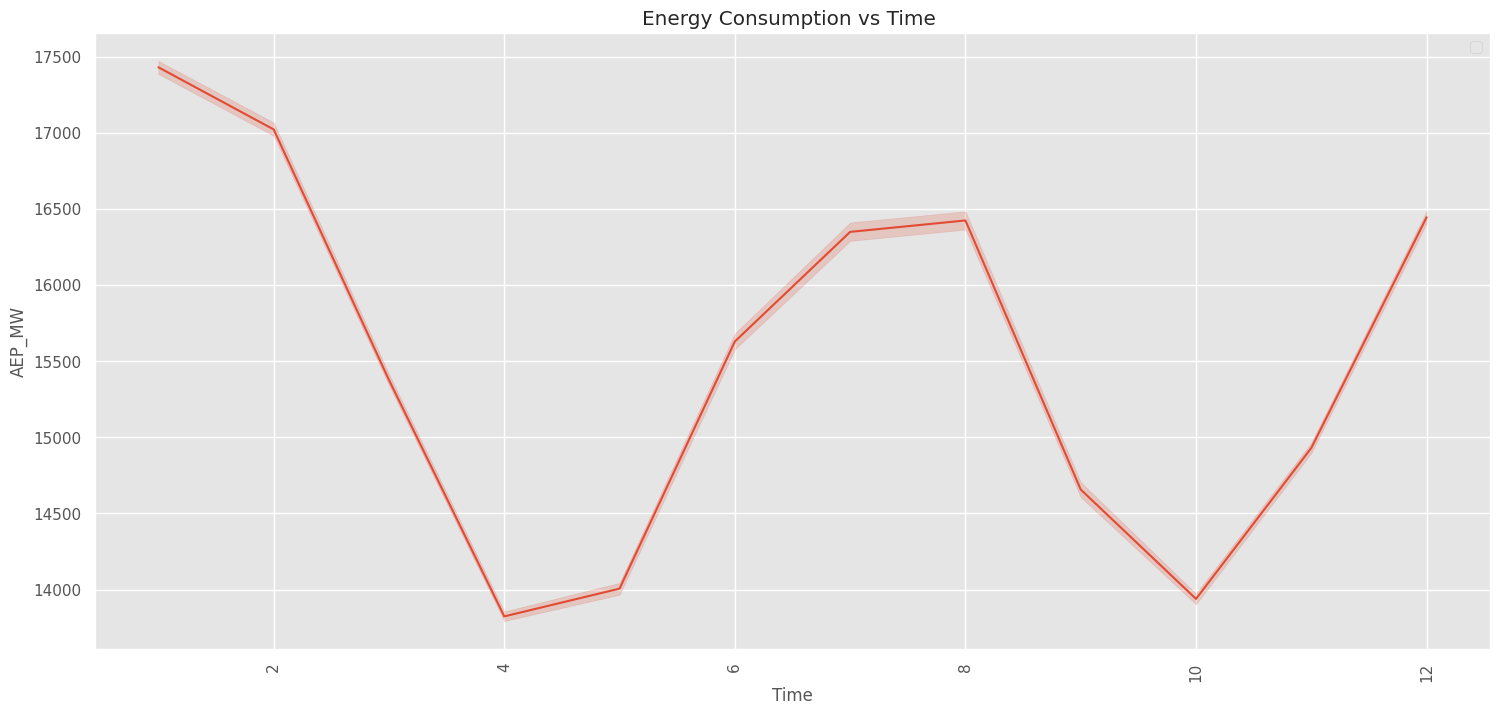

In [ ]:
# print(dataset)
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x = df["Month"], y = df["AEP_MW"], data = df)
# sns.relplot(data=df, x="Time", y="AEP_MW", kind="line")
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


**Resampleing** **Data**


In [ ]:
NewDataSet = dataset.resample('D').mean()

<ipython-input-8-8226c2f53dbb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NewDataSet = dataset.resample('D').mean()


In [ ]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape)

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


In [ ]:
TestData = NewDataSet.tail(100)
Training_Set = NewDataSet.iloc[:,0:1]
Training_Set = Training_Set[:-60]

TestData,Training_Set,Training_Set

(                  AEP_MW  Month    Year  Week
 Datetime                                     
 2018-04-26  13157.791667    4.0  2018.0  17.0
 2018-04-27  12964.000000    4.0  2018.0  17.0
 2018-04-28  12237.583333    4.0  2018.0  17.0
 2018-04-29  12156.791667    4.0  2018.0  17.0
 2018-04-30  13443.500000    4.0  2018.0  18.0
 ...                  ...    ...     ...   ...
 2018-07-30  15368.083333    7.0  2018.0  31.0
 2018-07-31  15180.291667    7.0  2018.0  31.0
 2018-08-01  15151.166667    8.0  2018.0  31.0
 2018-08-02  15687.666667    8.0  2018.0  31.0
 2018-08-03  14809.000000    8.0  2018.0  31.0
 
 [100 rows x 4 columns],
                   AEP_MW
 Datetime                
 2004-10-01  14284.521739
 2004-10-02  12999.875000
 2004-10-03  12227.083333
 2004-10-04  14309.041667
 2004-10-05  14439.708333
 ...                  ...
 2018-05-31  16741.083333
 2018-06-01  15734.666667
 2018-06-02  14212.166667
 2018-06-03  13824.625000
 2018-06-04  14127.500000
 
 [4995 rows x 1 column

In [ ]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
Train

array([[0.27243207],
       [0.16328467],
       [0.09762599],
       ...,
       [0.26628457],
       [0.23335788],
       [0.25909104]])

In [ ]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END
for i in range(60, Train.shape[0]):

    # X_Train 0-59
    X_Train.append(Train[i-60:i])

    # Y Would be 60 th Value based on past 60 Values
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [ ]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

**Create LSTM Model**

**Predicting Future Energy Consumption using LSTM**


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_Train, Y_Train, epochs = 20, batch_size = 32)

Epoch 1/20
155/155 [==============================] - 29s 127ms/step - loss: 0.0228
Epoch 2/20
155/155 [==============================] - 18s 119ms/step - loss: 0.0185
Epoch 3/20
155/155 [==============================] - 20s 126ms/step - loss: 0.0172
Epoch 4/20
155/155 [==============================] - 19s 119ms/step - loss: 0.0165
Epoch 5/20
155/155 [==============================] - 20s 127ms/step - loss: 0.0156
Epoch 6/20
155/155 [==============================] - 19s 120ms/step - loss: 0.0154
Epoch 7/20
155/155 [==============================] - 20s 128ms/step - loss: 0.0153
Epoch 8/20
155/155 [==============================] - 19s 119ms/step - loss: 0.0148
Epoch 9/20
155/155 [==============================] - 20s 126ms/step - loss: 0.0130
Epoch 10/20
155/155 [==============================] - 19s 122ms/step - loss: 0.0107
Epoch 11/20
155/155 [==============================] - 20s 128ms/step - loss: 0.0100
Epoch 12/20
155/155 [==============================] - 19s 120ms/step - lo

**Test Data**

In [ ]:
TestData.head(5)

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0
2018-04-28,12237.583333,4.0,2018.0,17.0
2018-04-29,12156.791667,4.0,2018.0,17.0
2018-04-30,13443.500000,4.0,2018.0,18.0


In [ ]:
TestData.shape

(100, 4)

In [ ]:
NewDataSet.shape

(5055, 4)